In [ ]:
import sys

sys.path.append(r"f:\\Data_Science_Learning")

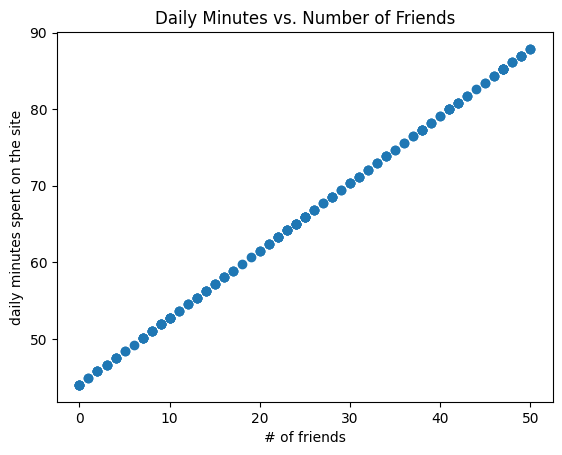

In [16]:
import random
from matplotlib import pyplot as plt

beta = random.random()
alpha = random.randint(0, 100)
num_friends = [random.randint(0, 50) for _ in range(200)]

daily_minutes = list(num * beta + alpha for num in num_friends)

plt.scatter(num_friends, daily_minutes)
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

# The Model

In [17]:
import library.Linear_Algebra as LA

def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

def predict_error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha: float, beta: float, x: LA.Vector, y: LA.Vector) -> float:
    return sum(predict_error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

In [18]:
from typing import Tuple
import library.Statistics as Stats

def least_squares_fit(x: LA.Vector, y: LA.Vector) -> Tuple[float, float]:
    beta = Stats.covariance(x, y)/Stats.variance(x)
    alpha = Stats.mean(y) - beta * Stats.mean(x)
    return alpha, beta

In [19]:
x = [i for i in range(-100, 110, 10)]
y = [3*i - 5 for i in x]

print(least_squares_fit(x, y))

(-5.0, 3.0)


In [20]:
alpha, beta = least_squares_fit(num_friends, daily_minutes)
print(alpha, beta)

44.0 0.877293485186912


In [21]:
def total_sum_of_squares(y: LA.Vector) -> float:
    return sum(v ** 2 for v in Stats.de_mean(y))

def r_squared(alpha: float, beta: float, x: LA.Vector, y: LA.Vector) -> float:
    """ 
    the fraction of variation in y captured by the model, which equals 
    1 - fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

# Using Gradient Descent

In [22]:
import random
import tqdm

import library.GradientDescent as GD

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]
learning_rate = 0.001
n = len(num_friends)

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = 2 * sum((predict_error(alpha, beta, x_i, y_i)) 
                     for x_i, y_i in zip(num_friends, daily_minutes)) / n
        
        grad_b = 2 * sum((predict_error(alpha, beta, x_i, y_i) * x_i)
                     for x_i, y_i in zip(num_friends, daily_minutes))/n
        
    
        mean_loss = sum_of_squared_errors(alpha, beta, num_friends, daily_minutes)/n

        t.set_description(f"loss: {mean_loss:.3f}")
        # Finally, update the guess
        guess = GD.gradient_step(guess, [grad_a, grad_b], learning_rate)

print(guess)

ModuleNotFoundError: No module named 'Linear_Algebra'